### ARMA
- ARIMA의 모수
    - AR모형의 Lag을 의미하는 p
        - AR모형 = "데이터 = 과거의 데이터 + noise"
    - MA모형의 Lag을 의미하는 q
        - MA모형 = "과거의 noise가 누적되며 현재의 데이터가 결과로 나타남"
        - 충격에 의해 데이터가 일시적으로 정상범위를 이탈한 뒤 다시 정상 회귀하는 모습 표현
    - 차분(Diffrence)횟수를 의미하는 d
- 통상적으로 p + q < 2, p * q = 0 인 값들을 많이 사용
    - 여기서 p * q = 0 이라 하면, 두 값중 하나는 0
    - 실제로 대부분의 시계열 자료에서는 하나의 경향만을 강하게 띄기 때문에, 이렇게 사용하는것이 더 잘 맞는다


### ACF
ACF(Autocorrelation function) : Lag에 따른 관측치들 사이의 관련성을 측정하는 함수

$$\rho_k = \frac{Cov(y_t, y_{t+k}}{/Var(y_t)}$$

- time lag=1 이후 급격하게 감소
- time lag=1 이후 자기상관이 0.2 수준을 유지

### PACF
PACF(Partial autocorrelation function) : k 이외의 모든 다른 시점 관측치의 영향력을 배제하고 $y_t$와 $y_{t-k}$ 두 관측치의 관련성을 측정하는 함수

$$\phi_{kk}=corr(y_t, y_{t-k}|y_{t-1},y_{t-2},...,y_{t-k+1})$$

- time lag=1 이후 급격하게 감소
- 첫 번째 또는 두 번째 시차에서의 유의한 상관 뒤에 유의하지 않은 상관이 있음
    - **데이터에 자기회귀 항이 있음**
    - 유의한 상관의 수 = 자기회귀 항의 차수 = 1

> 시계열 데이터가 AR의 특성을 띄는 경우, ACF는 천천히 감소하고 PACF는 처음 시차를 제외하고 급격히 감소한다.
> 반대로, MA의 특성을 띄는 경우 ACF는 급격히 감소하고 PACF는 천천히 감소한다.
> 급격히 감소하는 시차를 각 AR과 MA 모형의 모수(p, q)로 사용할 수 있다. 또한 데이터를 차분하여 ACF 및 PACF 계산함으로써 적절한 차분횟수까지 구할 수 있다




https://byeongkijeong.github.io/ARIMA-with-Python/

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pmdarima.arima import auto_arima
from pmdarima.arima import ADFTest

from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('./data/galaxy.csv')

In [4]:
df.shape

(1485, 9)

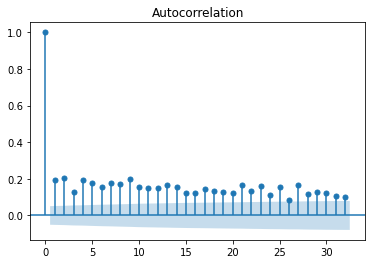

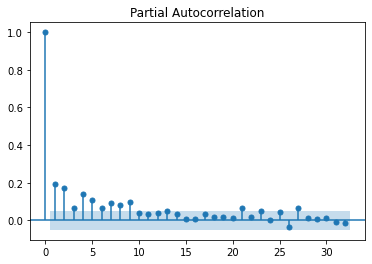

In [13]:
series = df['startprice']
plot_acf(series)
plot_pacf(series)
plt.show()

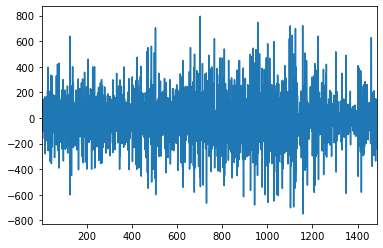

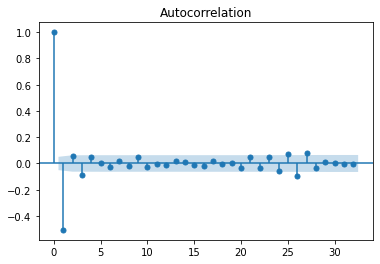

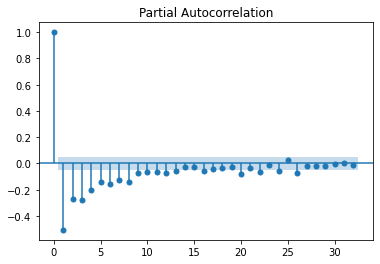

In [14]:
diff_1=series.diff(periods=1).iloc[1:]

diff_1.plot() # 1차 차분
plot_acf(diff_1) # 1차 차분에 대한 ACF Plot
plot_pacf(diff_1) # 1차 차분에 대한 PACF Plot
plt.show()

# 차분이후의 ACF와 PACF를 보니, 시계열이 정상상태(Stationary)를 보이는것으로 판단됨
# 1차차분 만으로 충분 > 따라서 본 데이터에는 ARIMA(0,1,1)을 사용

In [15]:
model = ARIMA(series, order=(0,1,1))
model_fit = model.fit()
print(model_fit.summary())
#print(model_fit.aic)

                               SARIMAX Results                                
Dep. Variable:             startprice   No. Observations:                 1485
Model:                 ARIMA(0, 1, 1)   Log Likelihood               -9654.268
Date:                Wed, 24 Feb 2021   AIC                          19312.537
Time:                        10:31:18   BIC                          19323.142
Sample:                             0   HQIC                         19316.490
                               - 1485                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9406      0.009   -109.112      0.000      -0.958      -0.924
sigma2      2.616e+04    805.730     32.463      0.000    2.46e+04    2.77e+04
Ljung-Box (L1) (Q):                   0.66   Jarque-

<AxesSubplot:>

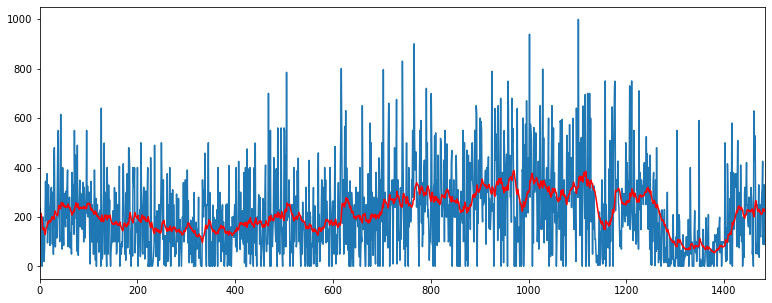

In [16]:
plt.figure(figsize=(13, 5))
series.plot()
model_fit.predict().plot(color='r')

# Time Series forecasting using Auto ARIMA in python
https://towardsdatascience.com/time-series-forecasting-using-auto-arima-in-python-bb83e49210cd

In [19]:
adf_test = ADFTest(alpha=0.05)
adf_test.should_diff(series) # False = Non-stationary

# Hence, we would need to use the “Integrated (I)” concept,
# denoted by value ‘d’ in time series to make the data stationary
# while building the Auto ARIMA model.

(0.01, False)

<AxesSubplot:>

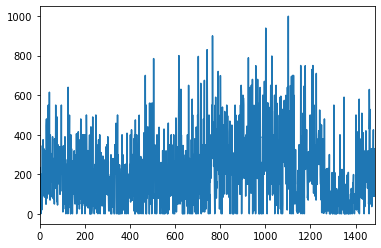

In [21]:
series.plot()

In [20]:
len(series)

1485

1200 285


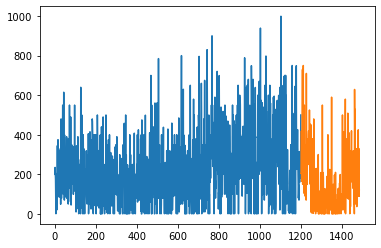

In [26]:
train = series[:1200]
test = series[1200:]
print(len(train), len(test))
plt.plot(train)
plt.plot(test)

In [24]:
arima_model = auto_arima(train, start_p=0, d=1, start_q=0,
                        max_p=5, max_d=5, max_q=5, start_P=0,
                        start_Q=0, max_P=5, max_D=5, max_Q=5,
                        m=1, seasonal=True, error_action='warn',
                        trace=True, random_state=0, n_fits=100,
                         stepwise=True, n_jobs=-1)

/opt/anaconda3/envs/AI_dev/lib/python3.7/site-packages/pmdarima/arima/_validation.py:77: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=16420.334, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=16072.161, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=15684.898, Time=0.23 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=16418.336, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=15684.193, Time=0.37 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=15682.285, Time=0.62 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=15981.949, Time=0.08 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=15682.905, Time=0.72 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=15681.504, Time=1.08 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=15688.600, Time=0.45 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=15683.160, Time=1.38 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=15681.653, Time=1.40 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=15680.977, Time=0.94 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=15682.308, Time=0.47 sec
 ARIMA(1,1,4)(0,0,0

In [25]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1200
Model:               SARIMAX(1, 1, 3)   Log Likelihood               -7834.558
Date:                Wed, 24 Feb 2021   AIC                          15679.117
Time:                        10:44:05   BIC                          15704.563
Sample:                             0   HQIC                         15688.702
                               - 1200                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5584      0.251     -2.228      0.026      -1.049      -0.067
ma.L1         -0.3642      0.250     -1.454      0.146      -0.855       0.127
ma.L2         -0.5030      0.242     -2.082      0.037      -0.977      -0.029
ma.L3         -0.0946      0.028     -3.368      0.001      -0.150      -0.040
sigma2      2.767e+04    994.357     27.829      0.000    2.57e+04    2.96e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               114.79
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               2.25   Skew:                             0.70
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.59
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [31]:
pred = pd.DataFrame(arima_model.predict(n_periods=285), index=test.index)

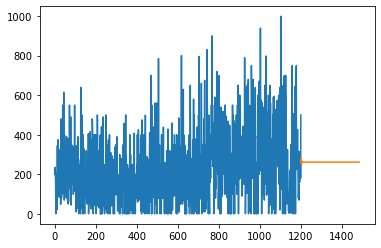

In [35]:
plt.plot(train)
#plt.plot(test)
plt.plot(pred)

In [34]:
pred

,0
1200,267.731214
1201,281.497075
1202,250.667963
1203,267.881709
1204,258.270240
...,...
1480,261.714027
1481,261.714027
1482,261.714027
1483,261.714027


# Standardized Startprice by productline?

In [48]:
# 이렇게까지 보면 좋겠지만, 우리는 예측할 때 sold 여부를 알 수 없다 (sold가 예측 타깃이기 때문)
pd.concat([df.groupby(['BuyItNow', 'productline', 'sold'])['startprice'].mean(),
           df.groupby(['BuyItNow', 'productline', 'sold'])['startprice'].std()],
           axis=1)

startprice  startprice
BuyItNow productline   sold                        
0        Galaxy_Note10 0     468.784540  151.063692
                       1     400.213243  126.137797
         Galaxy_Note8  0     258.026102  115.545331
                       1     198.411765   57.352077
         Galaxy_Note9  0     317.981957   90.610241
                       1     325.262000  101.825963
         Galaxy_S10    0     296.917500   47.263311
                       1     336.333333   85.031367
         Galaxy_S7     0     126.981750   55.854296
                       1      84.726897   43.005072
         Galaxy_S8     0     248.551759  126.225511
                       1     182.019697   67.573664
         Galaxy_S9     0     317.914054  106.673186
                       1     232.071053   79.149773
         Unknown       0     208.135000  150.850342
                       1     232.497692  166.012178
1        Galaxy_Note10 0     416.711071  157.272237
                       1     185.255179  163.210379
         Galaxy_Note8  0     198.855000   96.602136
                       1      88.213333   82.267983
         Galaxy_Note9  0     267.911667   96.447946
                       1     132.853824   96.252107
         Galaxy_S10    1     160.000000         NaN
         Galaxy_S7     0     122.860000   97.206543
                       1      39.506146   37.346137
         Galaxy_S8     0     173.103243   89.914461
                       1      67.622424   62.255231
         Galaxy_S9     0     236.517368  104.836709
                       1      89.381304   80.056522
         Unknown       0     216.254286  176.513101
                       1      61.108571   78.411165